**EXPLORATORY DATA ANALYSIS(EDA)**

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context="notebook", style="darkgrid", palette="Paired", font="sans-serif", font_scale=1, color_codes=True)
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [95]:
data = pd.read_csv("leads.csv",encoding= 'unicode_escape')

In [96]:
data.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
data.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [98]:
data = data.drop(['permalink','homepage_url'],axis=1)
data.columns = ['name','category_list', 'market',
       'funding_total_usd', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H']

In [99]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   category_list         45477 non-null  object 
 2   market                45470 non-null  object 
 3   funding_total_usd     49438 non-null  object 
 4   status                48124 non-null  object 
 5   country_code          44165 non-null  object 
 6   state_code            30161 non-null  object 
 7   region                44165 non-null  object 
 8   city                  43322 non-null  object 
 9   funding_rounds        49438 non-null  float64
 10  founded_at            38554 non-null  object 
 11  founded_month         38482 non-null  object 
 12  founded_quarter       38482 non-null  object 
 13  founded_year          38482 non-null  float64
 14  first_funding_at      49438 non-null  object 
 15  last_funding_at    

name                     4857
category_list            8817
market                   8824
funding_total_usd        4856
status                   6170
country_code            10129
state_code              24133
region                  10129
city                    10972
funding_rounds           4856
founded_at              15740
founded_month           15812
founded_quarter         15812
founded_year            15812
first_funding_at         4856
last_funding_at          4856
seed                     4856
venture                  4856
equity_crowdfunding      4856
undisclosed              4856
convertible_note         4856
debt_financing           4856
angel                    4856
grant                    4856
private_equity           4856
post_ipo_equity          4856
post_ipo_debt            4856
secondary_market         4856
product_crowdfunding     4856
round_A                  4856
round_B                  4856
round_C                  4856
round_D                  4856
round_E   

<Axes: >

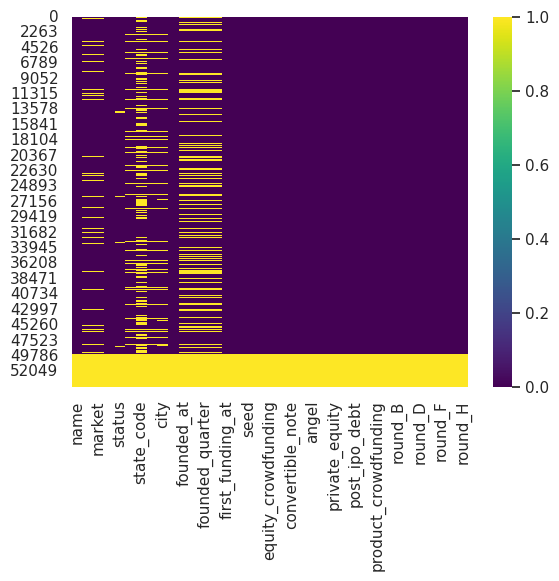

In [100]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),cmap="viridis")

In [101]:
data.shape

(54294, 37)

In [102]:
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace(',',''))
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace(' ',''))
data["funding_total_usd"] = data["funding_total_usd"].astype(str).apply(lambda x: x.replace('-',''))
data['funding_total_usd'] = pd.to_numeric(data['funding_total_usd'], errors='coerce')
data["funding_total_usd"].head()

,funding_total_usd
0,1750000.0
1,4000000.0
2,40000.0
3,1500000.0
4,60000.0


In [103]:
data_new = data.dropna()
fig=px.scatter_3d(data_new,x='funding_total_usd',y='market',z='region',color='status',size='funding_rounds',hover_data=['name'])
fig.show()

<Axes: xlabel='count', ylabel='founded_year'>

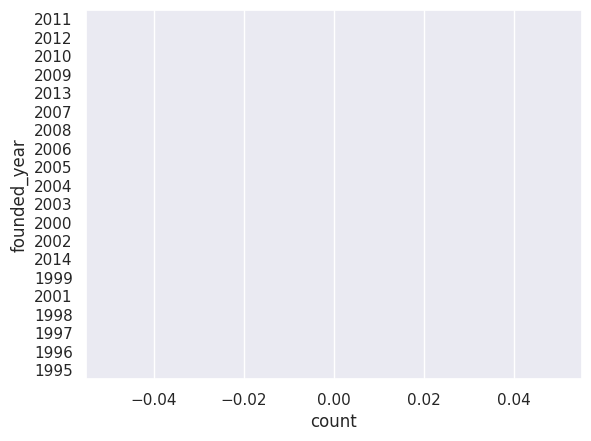

In [104]:
sns.countplot(data=data_new,y="founded_year",order=data_new["founded_year"].astype(int).value_counts()[:20].index)


Text(0.5, 1.0, 'Top 20 countries for Startups')

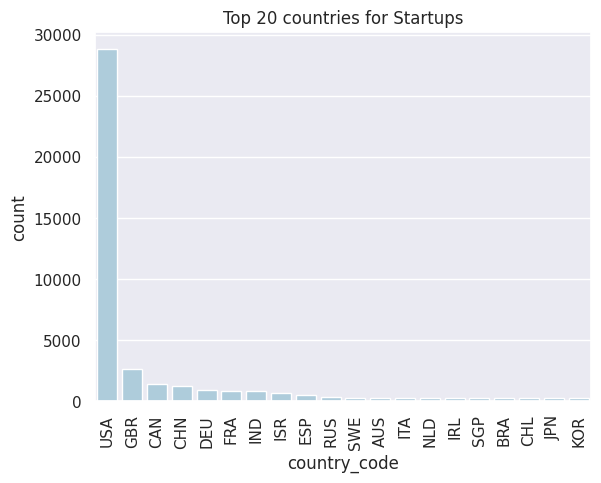

In [105]:
sns.countplot(data = data,x="country_code",order=data["country_code"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Top 20 countries for Startups")


Text(0.5, 1.0, 'Top 20 States for Startups')

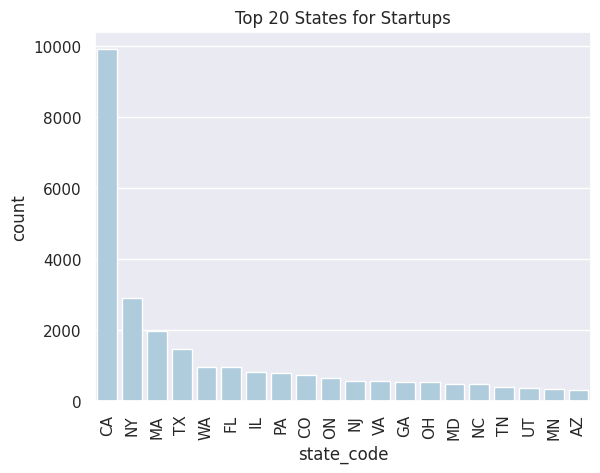

In [106]:
sns.countplot(data = data,x="state_code",order=data["state_code"].value_counts()[:20].index)
plt.xticks(rotation=90)
plt.title("Top 20 States for Startups")


Text(0.5, 1.0, 'Top 20 Region for Startups')

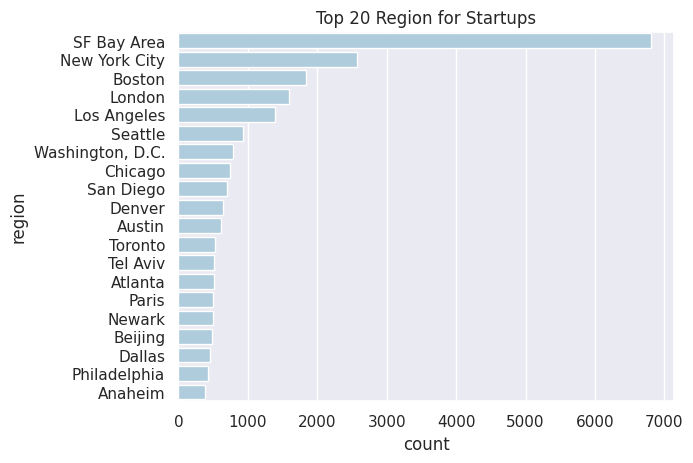

In [107]:
sns.countplot(data = data,y="region",order=data["region"].value_counts()[:20].index)
plt.title("Top 20 Region for Startups")


Text(0.5, 1.0, 'Top 20 cities')

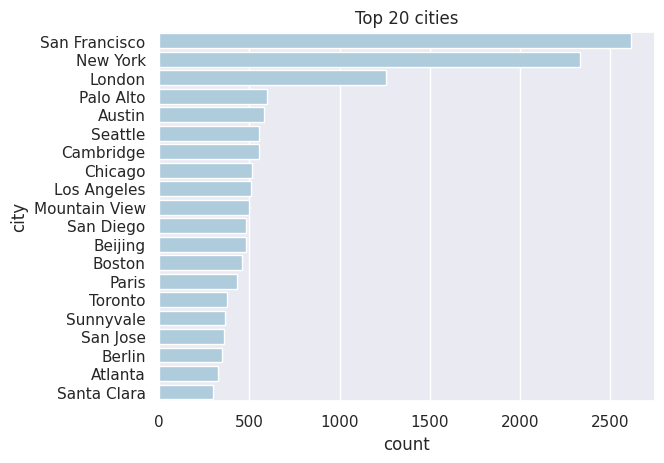

In [108]:
sns.countplot(data = data,y="city",order=data["city"].value_counts()[:20].index)
plt.title("Top 20 cities")


Text(0.5, 1.0, 'Top 20 startups in market')

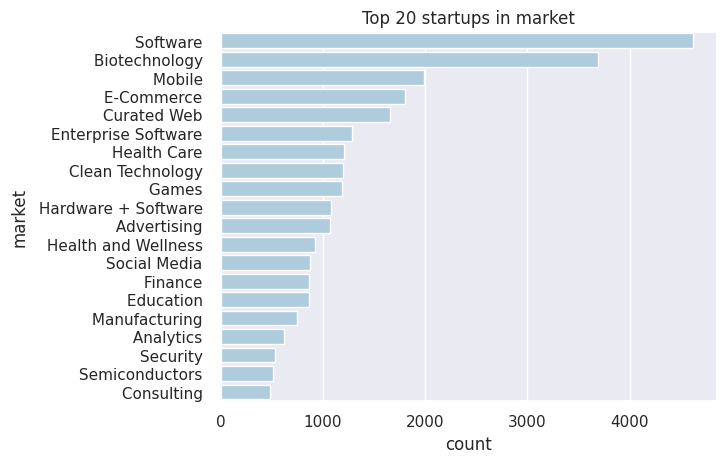

In [109]:
sns.countplot(data = data,y="market",order=data["market"].value_counts()[:20].index)
plt.title("Top 20 startups in market")

In [110]:
data.describe()

,funding_total_usd,funding_rounds,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,4.090700e+04,49438.000000,38482.000000,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,...,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04,4.943800e+04
mean,1.591253e+07,1.696205,2007.359129,2.173215e+05,7.501051e+06,6.163322e+03,1.302213e+05,2.336410e+04,1.888157e+06,6.541898e+04,...,3.845592e+04,7.074227e+03,1.243955e+06,1.492891e+06,1.205356e+06,7.375261e+05,3.424682e+05,1.697692e+05,5.767067e+04,1.423197e+04
std,1.686788e+08,1.294213,7.579203,1.056985e+06,2.847112e+07,1.999048e+05,2.981404e+06,1.432046e+06,1.382046e+08,6.582908e+05,...,3.864461e+06,4.282166e+05,5.531974e+06,7.472704e+06,7.993592e+06,9.815218e+06,5.406915e+06,6.277905e+06,5.252312e+06,2.716865e+06
min,1.000000e+00,1.000000,1902.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.500000e+05,1.000000,2006.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,2010.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+07,2.000000,2012.000000,2.500000e+04,5.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,1.300000e+08,2.351000e+09,2.500000e+07,2.924328e+08,3.000000e+08,3.007950e+10,6.359026e+07,...,6.806116e+08,7.200000e+07,3.190000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,1.000000e+09,6.000000e+08


Text(0.5, 1.0, 'Startups founded after 2006')

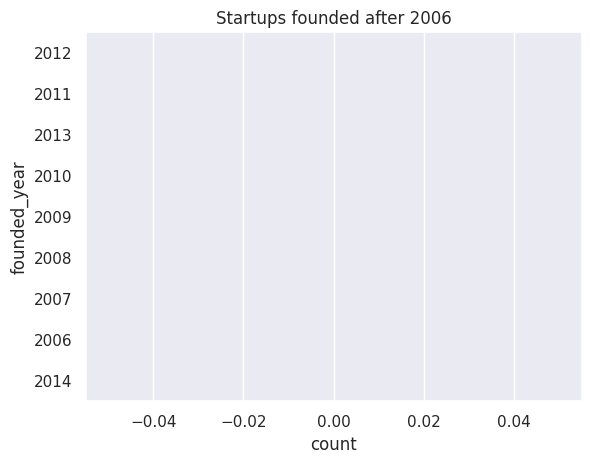

In [111]:
founded_after_2006 = data[data["founded_year"]>=2006]
sns.countplot(data=founded_after_2006,y = "founded_year",order = founded_after_2006["founded_year"].astype(int).value_counts().index)
plt.title("Startups founded after 2006")


Text(0.5, 1.0, 'Startups founded before 2006')

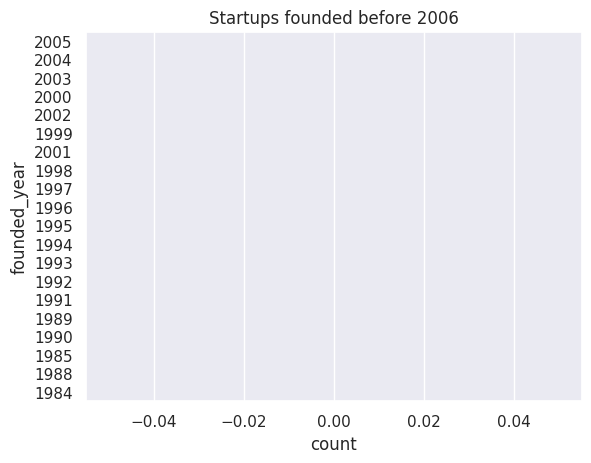

In [112]:
founded_before_2006 = data[data["founded_year"]<2006]
sns.countplot(data=founded_before_2006,y = "founded_year",order = founded_before_2006["founded_year"].astype(int).value_counts()[:20].index)
plt.title("Startups founded before 2006")


<Axes: xlabel='status', ylabel='count'>

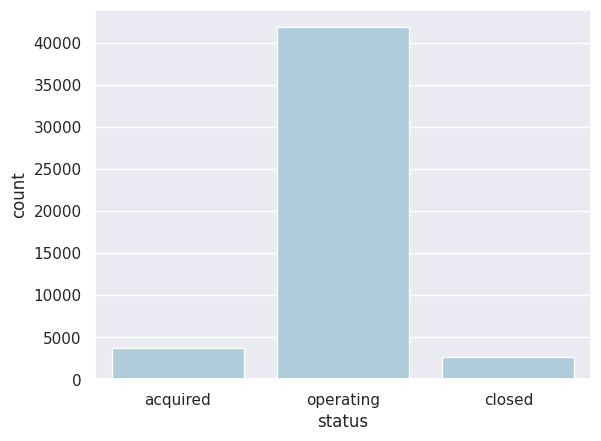

In [113]:
sns.countplot(data = data , x = "status")

([<matplotlib.patches.Wedge at 0x7c63e4690c50>,
 [Text(-0.43942333807188394, -1.0084181325014754, 'operating'),
  Text(0.6585039471000588, 1.0031812157599658, 'acquired'),
  Text(0.20293278776828055, 1.182716484897625, 'closed')],
 [Text(-0.2396854571301185, -0.5500462540917137, '86.9%'),
  Text(0.3841273024750343, 0.5851890425266467, '7.7%'),
  Text(0.11837745953149699, 0.6899179495236146, '5.4%')])

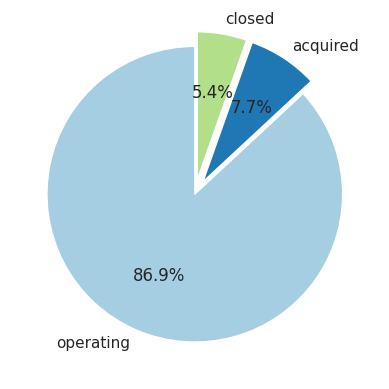

In [114]:
x = data["status"].value_counts()
plt.pie(x,labels=x.index,startangle=90,autopct="%1.1f%%",explode = (0,0.1,0.1))


In [115]:
USA_data = data[data["country_code"]=="USA"]

Text(0.5, 1.0, 'Top cities in Usa')

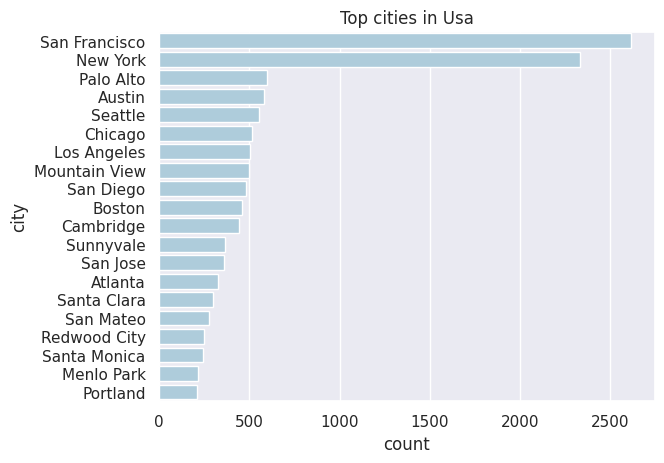

In [116]:
sns.countplot(data=USA_data,y="city",order = USA_data["city"].value_counts()[:20].index)
plt.title("Top cities in Usa")

Text(0.5, 1.0, 'Top startups in usa market')

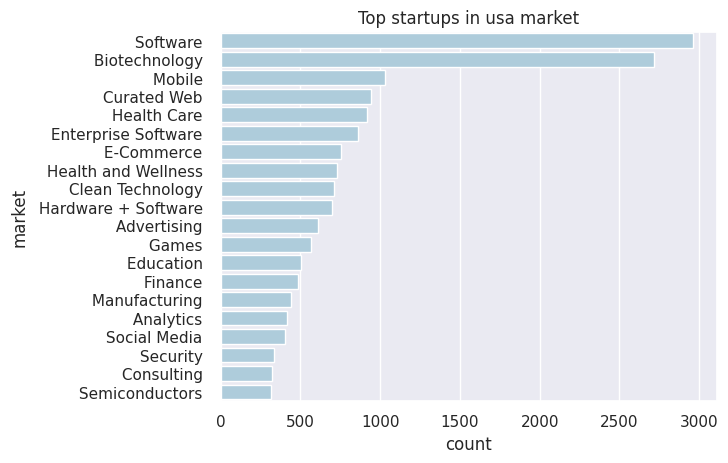

In [117]:
sns.countplot(data=USA_data,y="market",order = USA_data["market"].value_counts()[:20].index)
plt.title("Top startups in usa market")

Text(0.5, 1.0, 'Top states in USA')

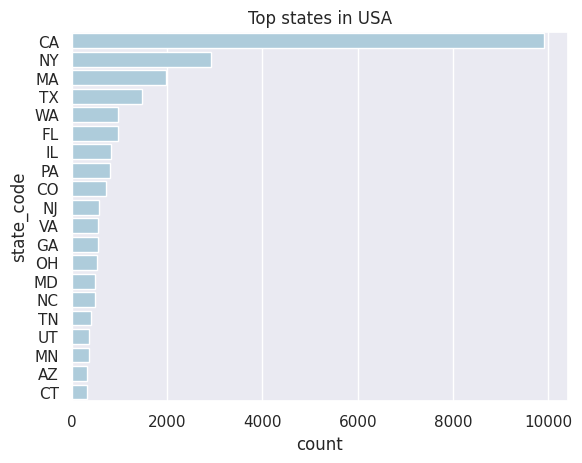

In [118]:
sns.countplot(data=USA_data,y="state_code",order = USA_data["state_code"].value_counts()[:20].index)
plt.title("Top states in USA")


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '2000.0'),
  Text(1, 0, '2001.0'),
  Text(2, 0, '2002.0'),
  Text(3, 0, '2003.0'),
  Text(4, 0, '2004.0'),
  Text(5, 0, '2005.0'),
  Text(6, 0, '2006.0'),
  Text(7, 0, '2007.0'),
  Text(8, 0, '2008.0'),
  Text(9, 0, '2009.0'),
  Text(10, 0, '2010.0'),
  Text(11, 0, '2011.0'),
  Text(12, 0, '2012.0'),
  Text(13, 0, '2013.0'),
  Text(14, 0, '2014.0')])

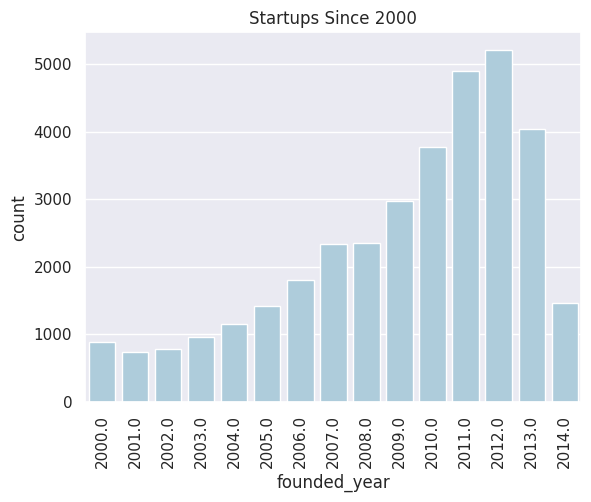

In [119]:
sns.countplot(data=data[data["founded_year"]>=2000],x="founded_year")
plt.title("Startups Since 2000")
plt.xticks(rotation=90)

In [120]:
## Companies,who got seed fundings
data_seed = data[data["seed"]>0]

Text(0.5, 1.0, 'Comapanies status who got seed funding')

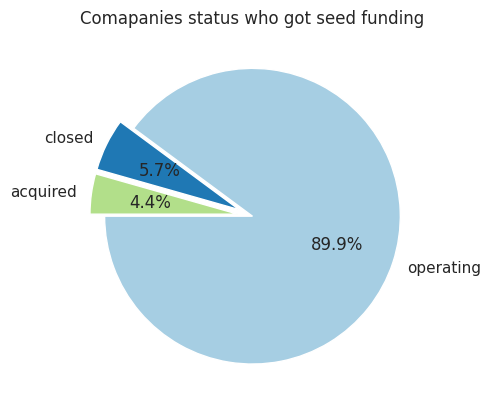

In [121]:
y = data_seed["status"].value_counts()
plt.pie(y,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who got seed funding")


In [122]:
## Companies who did not get seed funding
data_seed_not = data[data["seed"]==0]

Text(0.5, 1.0, 'Comapanies status who did not get seed funding')

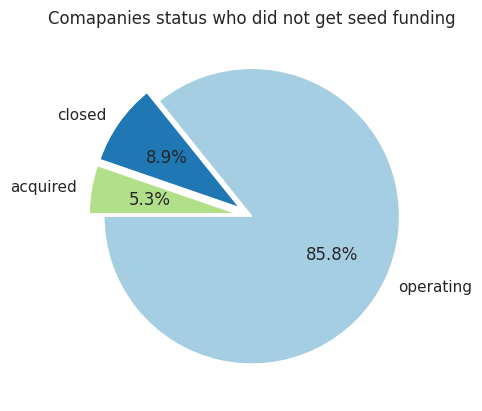

In [123]:
z = data_seed_not["status"].value_counts()
plt.pie(z,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who did not get seed funding")


In [124]:
High_funded = data[data["funding_total_usd"]>1000000000.0]

Text(0.5, 1.0, 'Companies status whose fundings are more than 1 Billion US$')

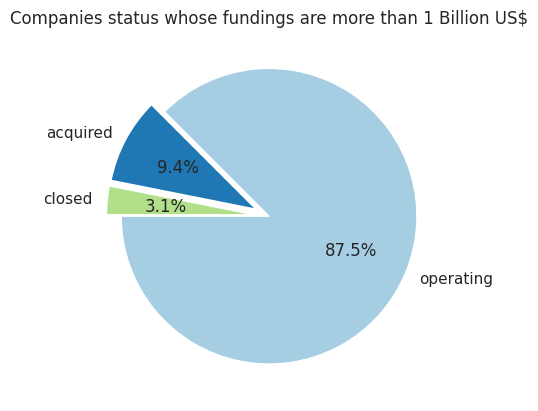

In [125]:
x = High_funded["status"].value_counts()
plt.pie(x,labels=x.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Companies status whose fundings are more than 1 Billion US$")

(array([28.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.04504000e+09, 3.94848630e+09, 6.85193260e+09, 9.75537890e+09,
        1.26588252e+10, 1.55622715e+10, 1.84657178e+10, 2.13691641e+10,
        2.42726104e+10, 2.71760567e+10, 3.00795030e+10]),
 <BarContainer object of 10 artists>)

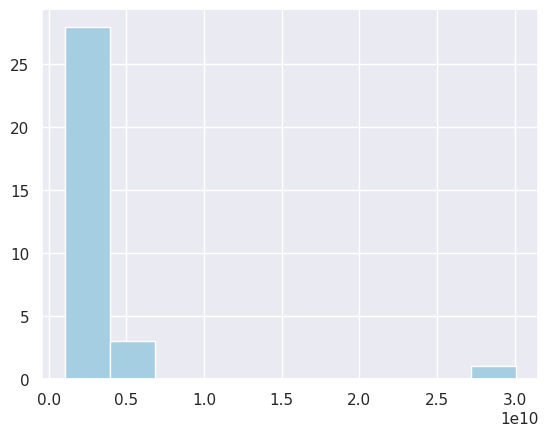

In [126]:
plt.hist(High_funded["funding_total_usd"])

<Axes: xlabel='count', ylabel='country_code'>

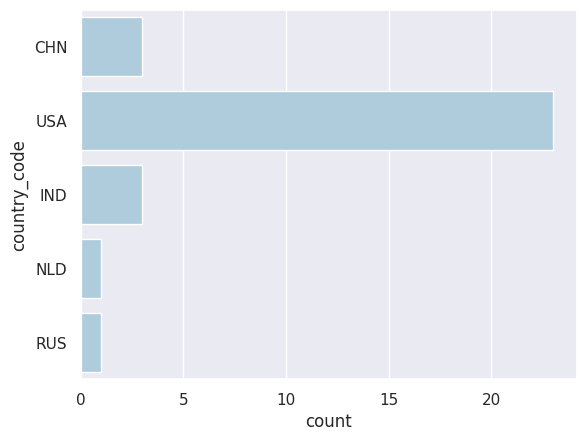

In [127]:
sns.countplot(data=High_funded,y="country_code")

<Axes: xlabel='count', ylabel='market'>

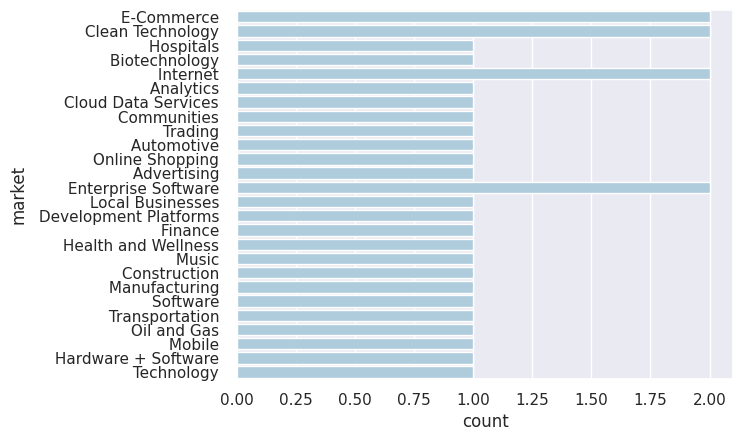

In [128]:
sns.countplot(data=High_funded,y="market")

<Axes: xlabel='count', ylabel='founded_year'>

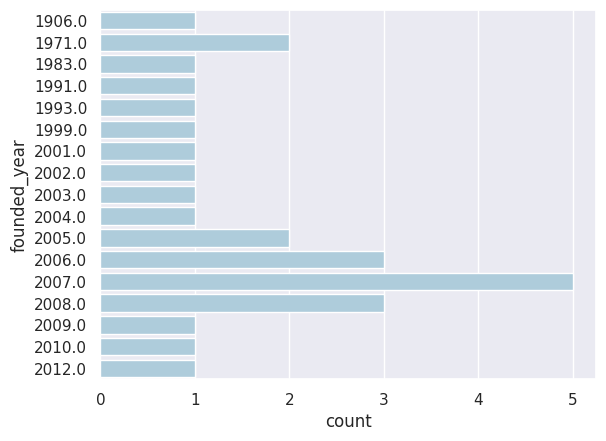

In [129]:
sns.countplot(data=High_funded,y="founded_year")

<Axes: ylabel='funding_total_usd'>

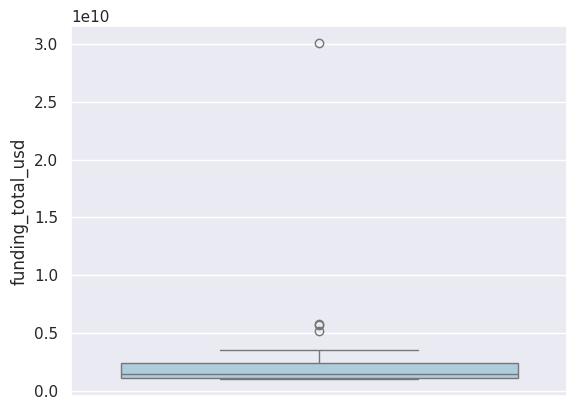

In [130]:
sns.boxplot(y="funding_total_usd",data=High_funded)


In [131]:
data_seed_only = data[data["funding_total_usd"]==data["seed"]]

Text(0.5, 1.0, 'Comapanies status who got only  seed funding')

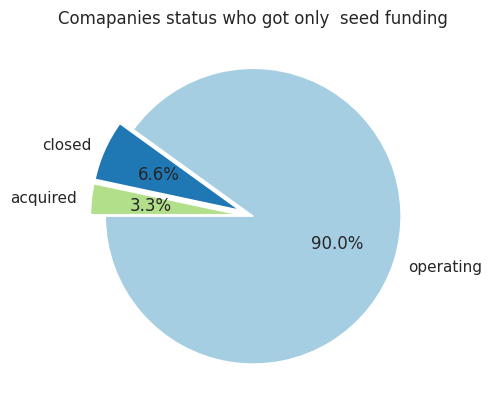

In [132]:
z = data_seed_only["status"].value_counts()
plt.pie(z,labels=y.index,startangle=180,autopct="%1.1f%%",explode = (0,0.1,0.1))
plt.title("Comapanies status who got only  seed funding")


Text(0.5, 1.0, 'top 32 Highest funded companies')

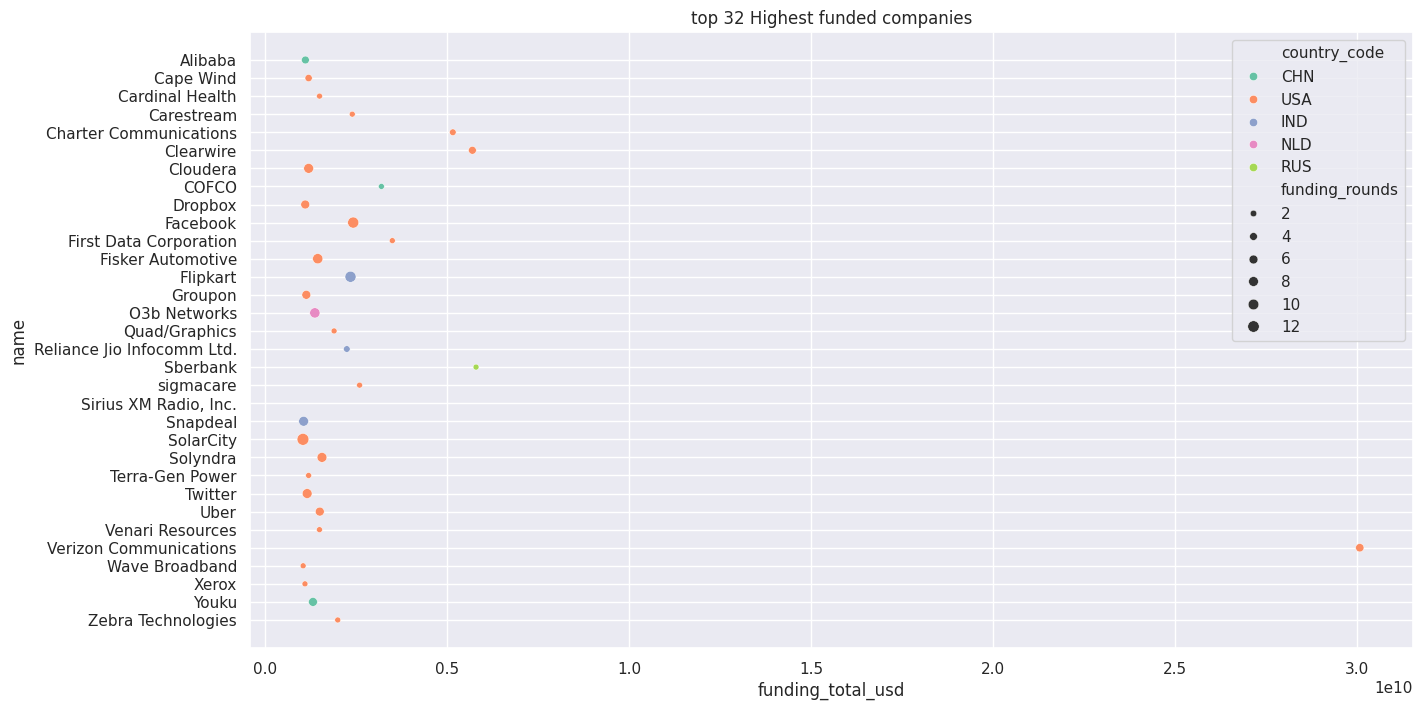

In [133]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="funding_total_usd",data=High_funded,hue="country_code",palette="Set2",size="funding_rounds")
plt.title("top 32 Highest funded companies")

Text(0.5, 1.0, 'Founded year of top funded companies')

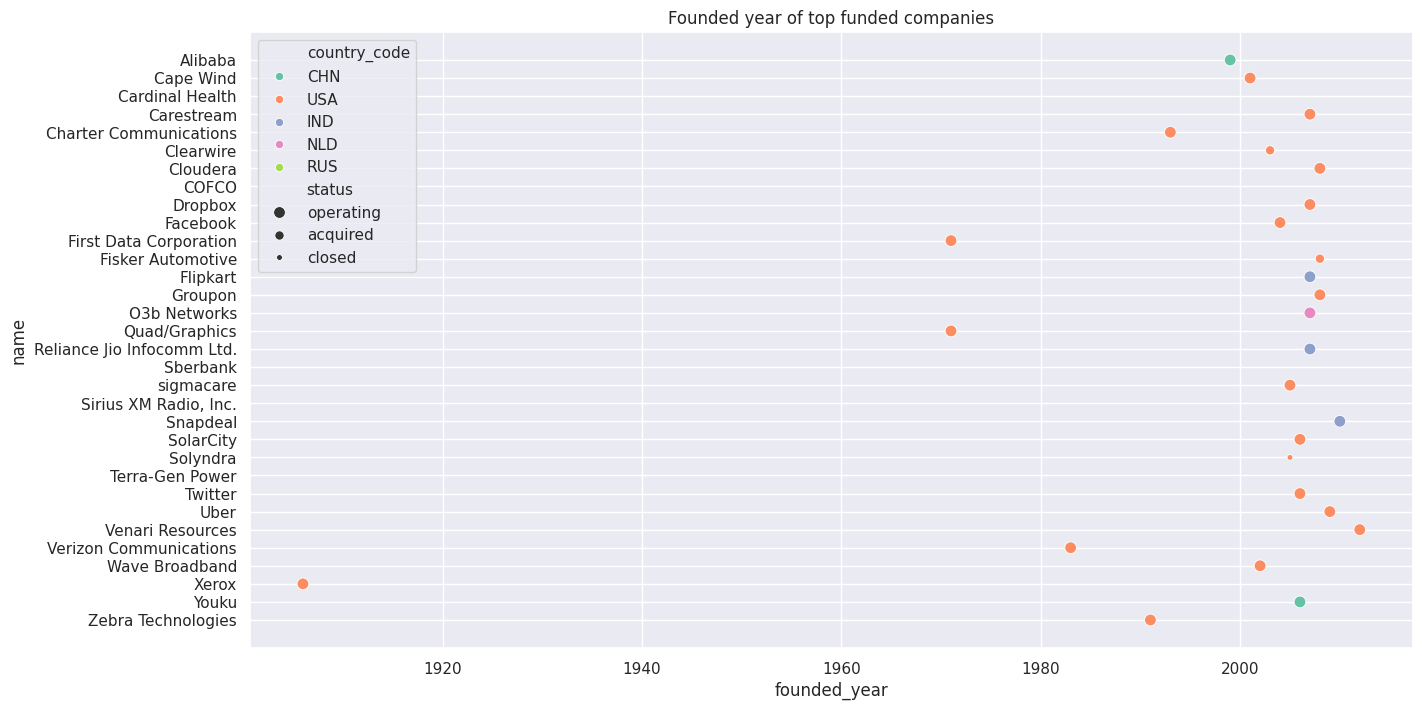

In [134]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="founded_year",data=High_funded,hue="country_code",palette="Set2",size="status")
plt.title("Founded year of top funded companies")

<Axes: xlabel='funding_total_usd', ylabel='name'>

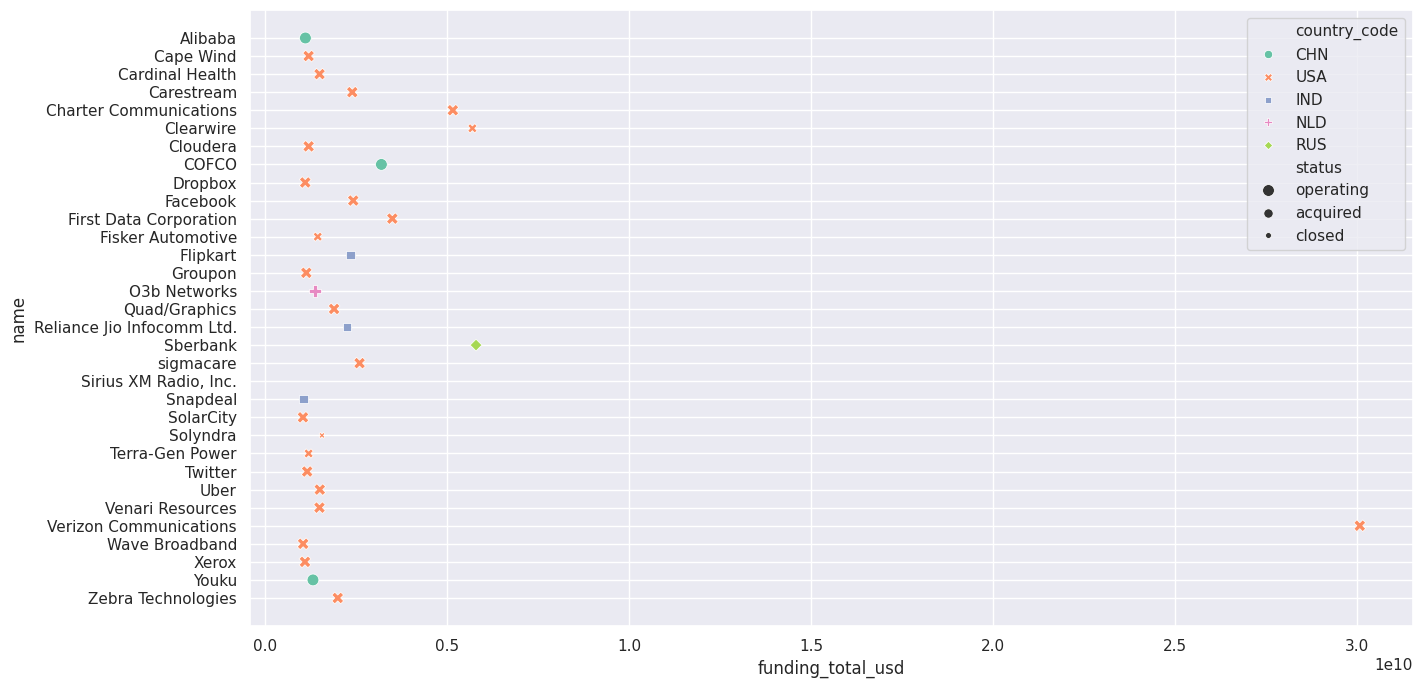

In [135]:
plt.figure(figsize=(15,8))
sns.scatterplot(y="name",x="funding_total_usd",data=High_funded,hue="country_code",style="country_code",palette="Set2",size="status")


Text(0.5, 1.0, 'Funding distributions')

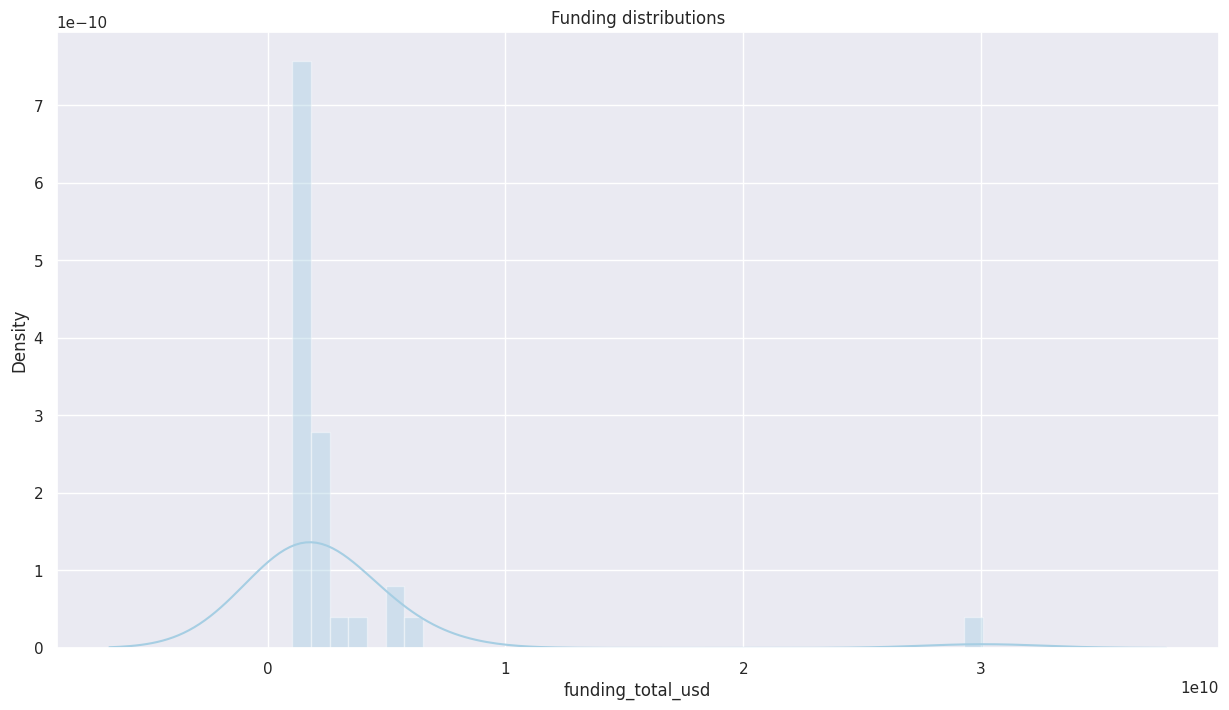

In [136]:
plt.figure(figsize=(15,8))
sns.distplot(High_funded["funding_total_usd"])
plt.title("Funding distributions")



In [137]:
figin = go.Figure()

import plotly.express as px
import plotly.graph_objects as go

figin = go.Figure()
IndianStartup =  data[data["country_code"]=="IND"]
figin.add_trace(go.Scatter(
                x=IndianStartup['name'],
                y=IndianStartup['funding_total_usd'],
                name="",
                line_color='orange'))
figin.update_layout(title_text="funding status in india")
figin.show()